In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# 2. Data Loading & Exploration
df = pd.read_csv("owid-covid-data.csv")

df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [4]:
# 3. Data Cleaning
# Filter for selected countries (modify as needed)
countries = ["Kenya", "United States", "India"]
df = df[df['location'].isin(countries)].copy()

# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Handle missing numeric values by forward fill then zero fill
numeric_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']
for col in numeric_cols:
    df[col] = df[col].ffill()
    df[col] = df[col].fillna(0)

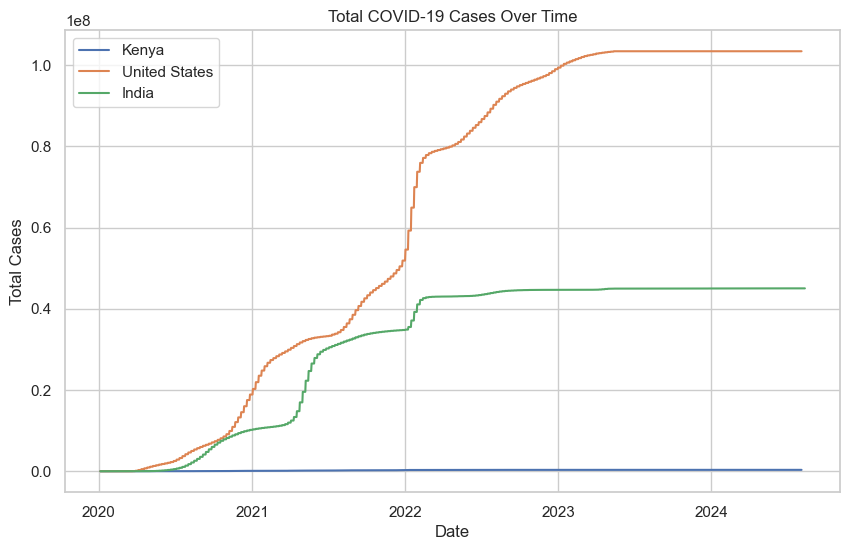

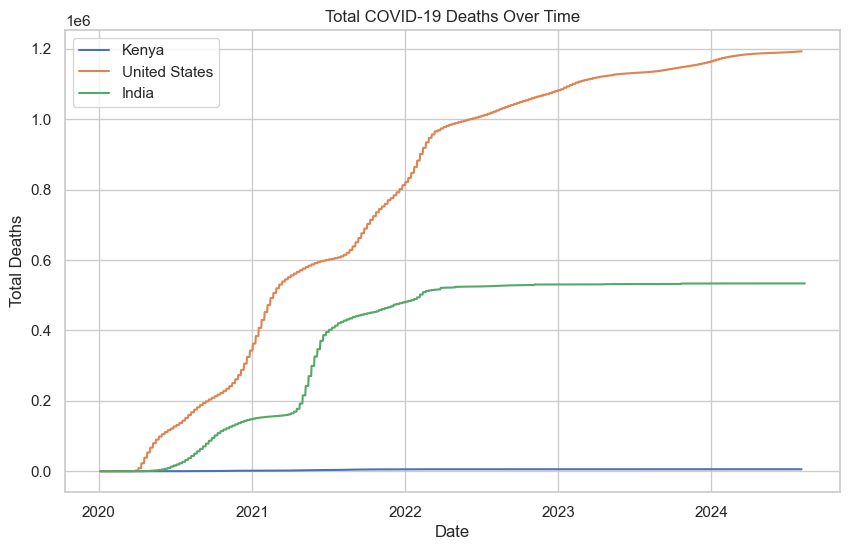

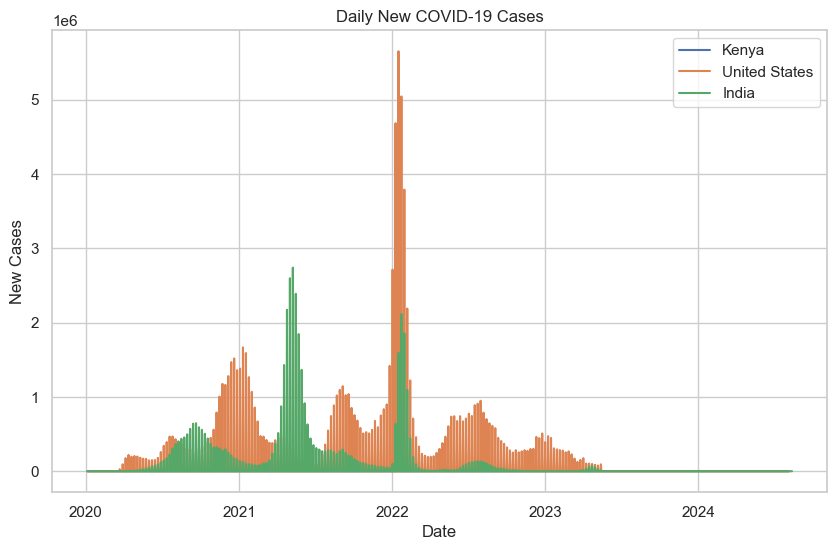

,location,date,death_rate
405120,United States,2024-07-31,0.011529
405121,United States,2024-08-01,0.011529
405122,United States,2024-08-02,0.011529
405123,United States,2024-08-03,0.011529
405124,United States,2024-08-04,0.011535


In [7]:
# 4. Exploratory Data Analysis (EDA)
# Plot total cases over time
plt.figure(figsize=(10,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

# Plot total deaths over time
plt.figure(figsize=(10,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()

# Compare daily new cases
plt.figure(figsize=(10,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()

# Calculate and display death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']
df[['location', 'date', 'death_rate']].tail()

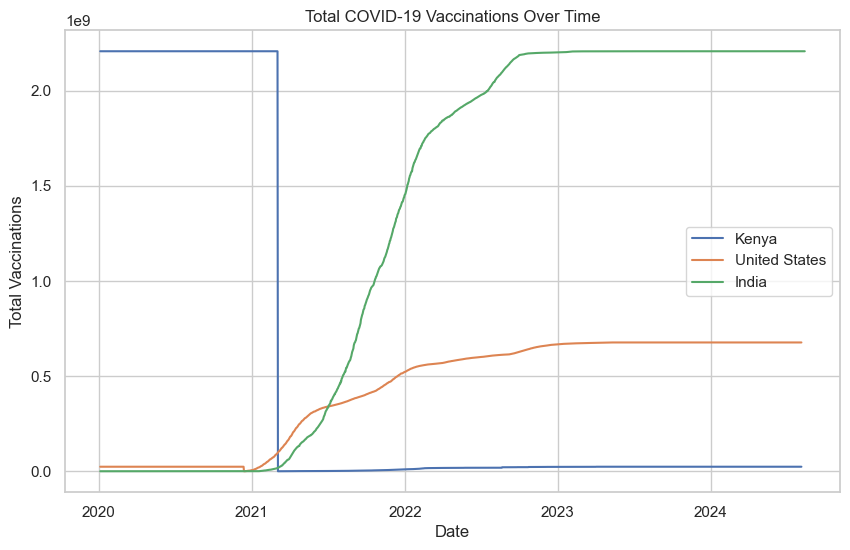

In [8]:
# 5. Visualizing Vaccination Progress
plt.figure(figsize=(10,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title("Total COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()

# COVID-19 Data Analysis: Initial Findings & Observations

This section summarizes the initial insights derived from exploring the COVID-19 data for India, Kenya, and the United States.

## Key Observations from Time Series Plots:

1.  **Disparate Impact Scale:** The United States and India have experienced a significantly higher number of total COVID-19 cases and total deaths throughout the pandemic compared to Kenya. This is consistently observed across all respective plots.

2.  **Wave Dynamics:**
    *   Both the United States and India exhibit distinct waves of infection, visible in the plots for total cases, total deaths, and particularly in the daily new cases. The timing and magnitude of these waves (e.g., early pandemic, Delta variant period, Omicron variant period) differ between the countries, reflecting unique epidemiological situations and responses.
    *   Kenya's case and death counts, while much lower, also show fluctuations indicative of pandemic waves, though these are less pronounced on a linear scale when compared directly with the USA and India.

3.  **Data Anomaly (India):** A notable sharp decrease is observed in the most recent data points (around August 2024) for both total cases and total deaths in India. This pattern suggests a potential data reporting anomaly, an artifact in the dataset for the latest entries, or a significant data correction. This requires careful consideration for any analysis focusing on the very latest trends for India.

4.  **Reporting Variability in New Cases:** The plot for daily new cases shows considerable day-to-day volatility for all countries, especially for the US and India during peak waves. This highlights the impact of reporting cycles (e.g., weekend effects) and suggests that smoothed data (like a 7-day rolling average) would be beneficial for identifying clearer underlying trends in infection rates.

## Next Steps & Further Analysis:

*   Calculate and visualize death rates to understand the severity of the pandemic in these countries.
*   Analyze vaccination progress to compare rollout speeds and coverage.
*   Further investigate the data anomaly for India's most recent figures.
